<img src="http://www.ceic.org.ar/spanish/img/siisa-logo.jpg" align='right'>

# Evaluacion sobre cliente 127 (cartasul)
El cliente 131 responde al grafo y la politica evaluada es la numero 1 que tiene que ver con nuevos. Hago una analisis solo desde el 2018/07/22 hasta el 2019/05/22 porque son 10507 registros y sino el dump de sql explota.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Client_127_Policy_1_20180722_20190522.cvs", low_memory=False)

In [3]:
df.shape

(10507, 210)

In [4]:
df.head()

,executionId,executionDate,executionDateTime,policyId,policyVersion,decisionResult,apellidoNombre,cartasur_actividadLaboral,cartasur_antLaboralGral,cartasur_canal,...,veraz_observacionesConqui60m,veraz_observacionesMontoCerrada1m,veraz_observacionesMontoCerrada24m,veraz_peorSituacionBureau4m,veraz_peorSituacionBureau5a12m,veraz_peorStatus12,veraz_peorStatusActual,veraz_poblacion,veraz_score,veraz_validado
0,991686,23/07/2018,09:36,1,58,OK|7000|Codigo rol:26955590,HERRERA MARIEL EMPERATI,Empleada Domestica,1844.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,991688,23/07/2018,09:36,1,58,OK|6500|Codigo rol:26805606,BAREIRO MAXIMO RAMON,Monotribustista,35998.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,991690,23/07/2018,09:37,1,58,OK|8500|Codigo rol:26805606,BAREIRO MAXIMO RAMON,Tarjeta en otra Entidad,35998.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,991695,23/07/2018,09:37,1,58,OK|13000|Codigo rol:26955644,BENITEZ FIDENCIA,Jubilado,35998.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,991708,23/07/2018,09:41,1,58,RECHAZA|Score SIISA (775) entre 350 y 799 y S...,GOMEZ DELGADO NOELIA SOLEDAD,Cooperativista,3293.0,0,...,0.0,0.0,0.0,NaN,NaN,9.0,9.0,ok,174.0,False


In [5]:
# tienen toda la misma politica??
df.policyId.unique()

array([1], dtype=int64)

In [6]:
# creo una columna que solo me diga si rechazo o califica.
df['decision_filtered'] = df.decisionResult.str.split("|", n = 1, expand = True)[0]

RECHAZA         5074
OK              4951
ERROR            397
ESCALAMIENTO      85
Name: decision_filtered, dtype: int64

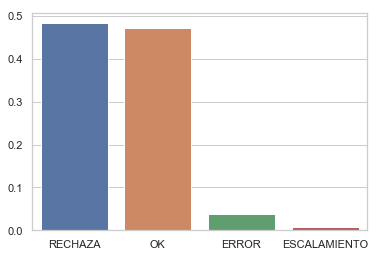

In [7]:
# Simplemente grafico la cantidad que pasa por califica o rechazo.
sns.set(style="whitegrid")
ax =sns.barplot(df.decision_filtered.value_counts().index, df.decision_filtered.value_counts().values/len(df.decision_filtered))
df.decision_filtered.value_counts()

In [8]:
# Genero una nueva columna que tiene que ver con si uso o no veraz por mas que este en dos puntos del arbol.
df['uso_veraz'] = pd.Series(np.repeat('NoUso', len(df.veraz_score)))

In [9]:
# Seteo las ocasiones en las que uso veraz.
df.loc[~df.veraz_score.isna(), 'uso_veraz'] = 'Uso'

In [10]:
# cuento la cantidad de veces que uso.
df.uso_veraz.value_counts()

NoUso    6574
Uso      3933
Name: uso_veraz, dtype: int64

In [11]:
# Tabla de contingencia class(califica/rechaza) / veraz (uso/noUsa) 
pd.crosstab(index=df.uso_veraz,
            columns=df.decision_filtered, margins=True)

decision_filtered,ERROR,ESCALAMIENTO,OK,RECHAZA,All
uso_veraz,,,,,
NoUso,397,45,3013,3119,6574
Uso,0,40,1938,1955,3933
All,397,85,4951,5074,10507


In [23]:
# No me interesa las instancias donde tengo ERROR o ESCALAMIENTO
df = df.drop(df[df.decision_filtered=='ERROR'].index)
df = df.drop(df[df.decision_filtered=='ESCALAMIENTO'].index)

In [24]:
# Tabla de contingencia class(califica/rechaza) / veraz (uso/noUsa) 
pd.crosstab(index=df.uso_veraz,
            columns=df.decision_filtered, margins=True)

decision_filtered,OK,RECHAZA,All
uso_veraz,,,
NoUso,3013,3119,6132
Uso,1938,1955,3893
All,4951,5074,10025


In [48]:
# Estrategia ahora es ver la correlacion de variables utilizadas por siisa y por veraz de modo tal de ver si alguna explica la
# otra.
df_con_veraz = df[df.uso_veraz=='Uso']
df_variables_elegidas = df_con_veraz.filter(regex=r'(siisa*|veraz*|decision_filtered)')


In [49]:
df_variables_elegidas.shape

(3893, 118)

In [51]:
df_variables_elegidas.decision_filtered.value_counts()

RECHAZA    1955
OK         1938
Name: decision_filtered, dtype: int64

In [58]:
df_variables_elegidas.head(3)

,siisa_apellidoNombre,siisa_autonomo,siisa_bacCompromiso,siisa_cacheHit,siisa_cant1s,siisa_cant2s,siisa_cant3s,siisa_cant4s,siisa_cant5s,siisa_cant6s,...,veraz_observacionesMontoCerrada24m,veraz_peorSituacionBureau4m,veraz_peorSituacionBureau5a12m,veraz_peorStatus12,veraz_peorStatusActual,veraz_poblacion,veraz_score,veraz_validado,decision_filtered,uso_veraz
4,GOMEZ DELGADO NOELIA SOLEDAD,False,0,False,1,0,0,0,0,0,...,0.0,NaN,NaN,9.0,9.0,ok,174.0,False,RECHAZA,Uso
7,ORTELLADO MARIA NELIDA,False,0,False,2,0,0,0,0,0,...,0.0,NaN,NaN,5.0,1.0,ok,201.0,False,RECHAZA,Uso
9,VIVAS MARTIN ARIEL,False,0,False,3,0,0,0,0,0,...,0.0,NaN,NaN,1.0,1.0,ok,614.0,False,OK,Uso


In [57]:
# veo cuales variables tienen Nan.
df_variables_elegidas.isna().sum()

siisa_apellidoNombre                     0
siisa_autonomo                           0
siisa_bacCompromiso                      0
siisa_cacheHit                           0
siisa_cant1s                             0
siisa_cant2s                             0
siisa_cant3s                             0
siisa_cant4s                             0
siisa_cant5s                             0
siisa_cant6s                             0
siisa_cantCheques                        0
siisa_cantMoras                          0
siisa_cantMorasBCRA                      0
siisa_codR                               0
siisa_compromiso                         0
siisa_concursosQuiebras                  0
siisa_consultaError                      0
siisa_consultasAno                       0
siisa_consultasDia                       0
siisa_consultasDosAno                    0
siisa_consultasMes                       0
siisa_consultasSeisMeses                 0
siisa_consultasSemana                    0
siisa_consu

In [76]:
df_variables_elegidas.drop(df_variables_elegidas.select_dtypes(['int64','float64']), inplace=False, axis=1)

,siisa_apellidoNombre,siisa_autonomo,siisa_cacheHit,siisa_codR,siisa_compromiso,siisa_concursosQuiebras,siisa_consultaError,siisa_cuitsCheques,siisa_direccion,siisa_domValidado,...,siisa_subsectorLaboral,siisa_telefono,siisa_telValidado,veraz_cacheHit,veraz_consultaError,veraz_llamado,veraz_poblacion,veraz_validado,decision_filtered,uso_veraz
4,GOMEZ DELGADO NOELIA SOLEDAD,False,False,False,8100,False,False,NaN,"RUTA2 KM31,5 ENTR45 - Florencio Varela - 1888 ...",False,...,NaN,NaN,False,False,False,C01204XML03225882055754411831127268242789GOMEZ...,ok,False,RECHAZA,Uso
7,ORTELLADO MARIA NELIDA,False,False,False,8700,False,False,NaN,PERU 5371 - MORENO - 1744 - BUENOS AIRES,False,...,Retail,NaN,False,False,False,C01204XML03225882055754411831127320110780ORTEL...,ok,False,RECHAZA,Uso
9,VIVAS MARTIN ARIEL,False,False,False,"6505,55555555556",False,False,NaN,MIGUEL CANE 906 - LOMAS DE ZAMORA - - BUENOS ...,False,...,Gastronómico,011 42447127,False,False,False,C01204XML03225882055754411831120359958383VIVAS...,ok,False,OK,Uso
11,PIZARRO YANINA KARINA,False,False,True,4800,False,False,NaN,30 E/116 Y 117 N°1661 - Berazategui - - BUENO...,False,...,NaN,NaN,False,False,False,C01204XML03225882055754411831127345011922PIZAR...,ok,False,RECHAZA,Uso
12,CHITERO SEBASTIAN ADRIAN,False,False,False,0,False,False,NaN,CLARK 722 - ALMIRANTE BROWN - - BUENOS AIRES,False,...,Transporte,2224 432595,False,False,False,C01204XML03225882055754411831120339854492CHITE...,ok,False,RECHAZA,Uso
14,ESPINOSA NORBERTO FABIAN,False,False,False,0,False,False,NaN,VELAZQUEZ 1880 - MALVINAS ARGENTINAS - - BUEN...,False,...,NaN,NaN,False,False,False,C01204XML03225882055754411831120307579023ESPIN...,th,False,RECHAZA,Uso
15,MAIDANA ERIKA ABIGAIL,False,False,False,0,False,False,NaN,RECONDO 546 - LOMAS DE ZAMORA - - BUENOS AIRES,False,...,NaN,NaN,False,False,False,C01204XML03225882055754411831127405648135MAIDA...,th,False,RECHAZA,Uso
16,VIVAS MARTIN ARIEL,False,True,False,"6505,55555555556",False,False,NaN,MIGUEL CANE 906 - LOMAS DE ZAMORA - - BUENOS ...,False,...,Gastronómico,011 42447127,False,True,False,C01204XML03225882055754411831120359958383VIVAS...,ok,False,OK,Uso
17,ROSALES MATIAS ALEJANDRO,False,False,False,0,False,False,NaN,GALIGNIANA 822 - ALMIRANTE BROWN - - BUENOS A...,False,...,NaN,NaN,False,False,False,C01204XML03225882055754411831120441293667ROSAL...,th,False,OK,Uso
18,TITUNIK GHINASSI IARA JANA INA,False,False,True,6300,False,False,NaN,OLIVIERI 262 - CAPITAL FEDERAL - - CAPITAL FE...,False,...,NaN,NaN,False,False,False,C01204XML03225882055754411831127415880346TITUN...,ok,False,RECHAZA,Uso


In [74]:
#df_variables_elegidas.drop(df_variables_elegidas.select_dtypes(['object']), inplace=False, axis=1)
for l in df_variables_elegidas.columns:
    print(l,df_variables_elegidas[l].dtype)

siisa_apellidoNombre object
siisa_autonomo bool
siisa_bacCompromiso int64
siisa_cacheHit bool
siisa_cant1s int64
siisa_cant2s int64
siisa_cant3s int64
siisa_cant4s int64
siisa_cant5s int64
siisa_cant6s int64
siisa_cantCheques int64
siisa_cantMoras int64
siisa_cantMorasBCRA int64
siisa_codR bool
siisa_compromiso object
siisa_concursosQuiebras bool
siisa_consultaError bool
siisa_consultasAno int64
siisa_consultasDia int64
siisa_consultasDosAno int64
siisa_consultasMes int64
siisa_consultasSeisMeses int64
siisa_consultasSemana int64
siisa_consultasTresMeses int64
siisa_cuil int64
siisa_cuitsCheques object
siisa_direccion object
siisa_domValidado bool
siisa_Dup1 float64
siisa_Dup2 float64
siisa_Dup3 float64
siisa_Dup4 float64
siisa_DupCuil1 int64
siisa_DupCuil2 int64
siisa_DupCuil3 int64
siisa_DupCuil4 int64
siisa_fallecido object
siisa_fnac object
siisa_fraudes bool
siisa_grupoFamiliar object
siisa_ingreso object
siisa_jubilado bool
siisa_llamado object
siisa_locValidada bool
siisa_maxBCR

In [83]:
import pandas as pd

df = pd.DataFrame({'x': ['a', 'b', 'c'], 'y': [1, 2, 3], 'z': ['d', 'e', 'f']})

df.drop(df.select_dtypes(['object']), inplace=True, axis=1)
print(df)

   y
0  1
1  2
2  3


In [84]:
for l in df.columns:
    print(l,df[l].dtype)

y int64
